<a href="https://colab.research.google.com/github/hericsaliby/DataScience_Projects/blob/main/Analisando_os_Dados_do_Airbnb_(Los_Angeles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*


---

# Análise dos Dados do Airbnb - Los Angeles

O [Airbnb](https://www.airbnb.com.br/) é considerado a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar e se hospedar com anfitriões que querem alugar seus imóveis de maneira prática. O Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa possível.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.



<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade do Rio de Janeiro, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*


In [ ]:
# importar as bibliotecas necessarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2021-01-02/visualisations/listings.csv")

## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,115,30,2,2016-05-15,0.02,1,279
1,2708,Runyon Canyon | Beau Furn Mir Mini-Suite Fire...,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,68,30,28,2020-11-08,0.35,2,316
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,155,1,21,2019-12-27,0.18,2,365
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,50,30,0,NaN,NaN,1,0
4,5728,Tiny Home in Artistic Oasis near Venice and LAX,9171,Sanni,City of Los Angeles,Del Rey,33.98750,-118.43200,Private room,42,30,310,2020-04-29,2.22,5,273


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 35847 entradas e 106 variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 32175
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

reviews_per_month                 0.234965
last_review                       0.234965
host_name                         0.000280
name                              0.000062
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

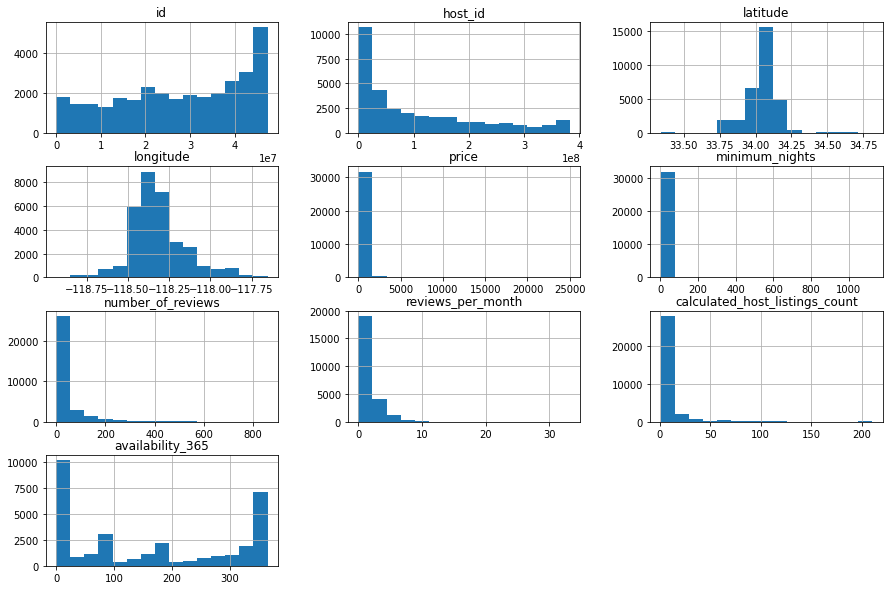

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,32175.000000,32175.000000,32175.000000,24615.000000,32175.000000,32175.000000
mean,220.870427,18.747568,34.376752,1.404572,9.266107,162.678757
std,596.925791,32.948624,66.202817,1.650527,24.144674,146.444838
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,70.000000,2.000000,1.000000,0.240000,1.000000,0.000000
50%,110.000000,25.000000,6.000000,0.790000,2.000000,139.000000
75%,187.500000,30.000000,36.000000,2.020000,5.000000,335.000000
max,24999.000000,1125.000000,858.000000,33.240000,210.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 632, porém seu valor máximo é 131727.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights


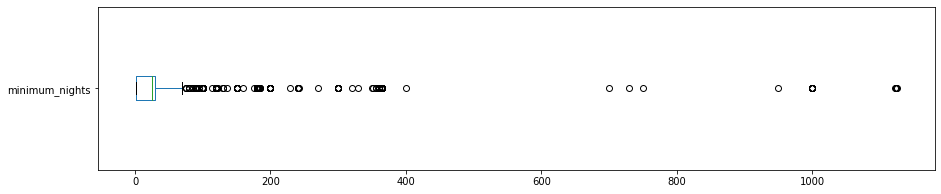

minimum_nights: valores acima de 30:
2826 entradas
8.7832%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

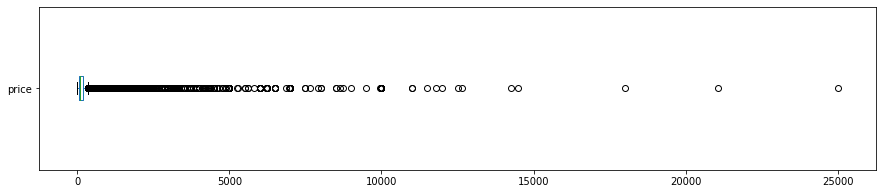


price: valores acima de 1500
512 entradas
1.5913%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

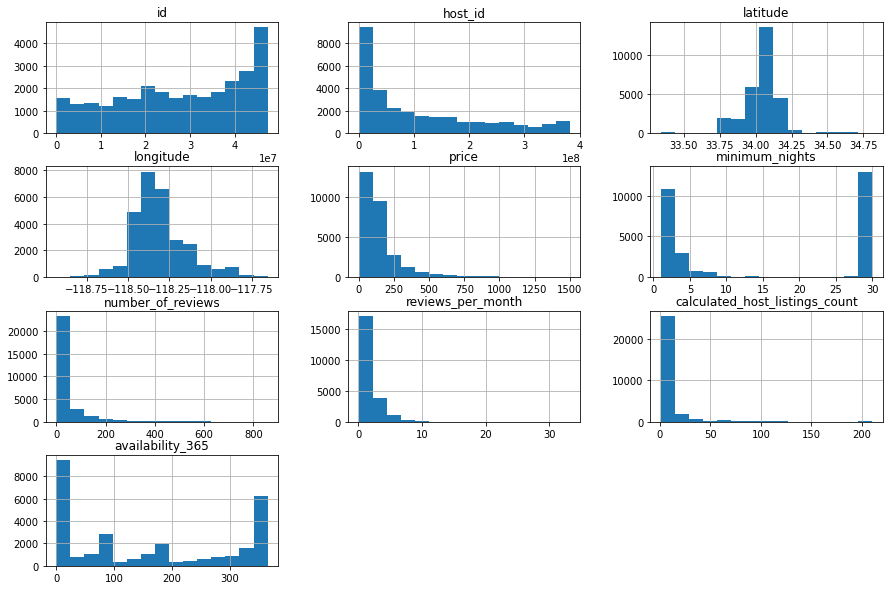

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.027942,-0.067342,-0.053077,0.012196,0.092654
minimum_nights,-0.027942,1.000000,-0.155223,-0.303060,0.112254,-0.000244
number_of_reviews,-0.067342,-0.155223,1.000000,0.702671,-0.106051,0.059382
reviews_per_month,-0.053077,-0.303060,0.702671,1.000000,-0.074958,0.068051
calculated_host_listings_count,0.012196,0.112254,-0.106051,-0.074958,1.000000,0.144523
availability_365,0.092654,-0.000244,0.059382,0.068051,0.144523,1.000000


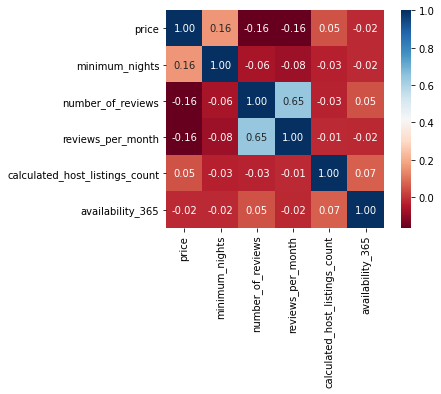

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    18208
Private room        9498
Shared room         1024
Hotel room           142
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.630646
Private room       0.328969
Shared room        0.035467
Hotel room         0.004918
Name: room_type, dtype: float64

### **Q6. Qual a localidade com o custo mais alto em Los Angeles?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [ ]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Westlake Village                         670.416667
Leona Valley                             582.000000
Malibu                                   570.254980
Beverly Crest                            568.071429
Bel-Air                                  465.500000
Hollywood Hills West                     425.167630
Avalon                                   399.032787
Unincorporated Santa Monica Mountains    397.382609
Palos Verdes Estates                     390.166667
Pacific Palisades                        352.068182
Name: price, dtype: float64

Podemos notar que o valor medio da diaria em Westaleke Village está em torno de 
670,42 dolares  muito superior ao custo do famoso bairro de Hollywood,que tem seu valor médio de 425.17 dolares
Acima, vemos que bairros como Westlake Village, Leona Valley, Malibu e Beverly Crest, estão com média de preço superior a de lugares como Hollywood Hills, Palos Verdes e Pacific Palisades.

Uma pessoa que não conhecesse Los Angeles poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Westlake Village.

In [ ]:
# ver quantidade de imóveis no Westlake Village
print(df_clean[df_clean.neighbourhood == "Westlake Village"].shape)

# ver as entradas do Westlake Village
df_clean[df_clean.neighbourhood == "Westlake Village"]

(12, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9160,18487751,Exclusive Executive Home,24425023,Nh,Westlake Village,34.14051,-118.81404,Entire home/apt,1500,7,0,NaN,NaN,1,0
9910,19697497,Morning View,138744766,Roxanne,Westlake Village,34.13507,-118.81439,Entire home/apt,942,2,2,2020-08-30,0.05,2,359
12951,23937030,Lake Front. Loft & Bedroom ~ Westlake Village.,94503527,Robin,Westlake Village,34.14056,-118.82986,Private room,114,1,31,2020-03-14,0.96,1,0
16049,29368333,Great townhome across from westlake lake,219959673,Jerry,Westlake Village,34.13766,-118.82095,Entire home/apt,225,3,21,2020-08-08,0.80,1,115
17205,31243644,A charming private bedroom in safest area,51027312,Azim,Westlake Village,34.14552,-118.80756,Private room,80,1,48,2020-09-01,2.41,1,0
24509,41853029,Indoor Outdoor Sunny Escape in Westlake Village,191490285,Sarah,Westlake Village,34.14532,-118.81824,Entire home/apt,249,3,1,2020-02-17,0.09,1,0
29186,45816578,Morning View in a Gorgeous Home,347906078,Amy,Westlake Village,34.13596,-118.81597,Entire home/apt,1163,2,0,NaN,NaN,2,89
29772,46122553,Westlake Village Home with a View,347906078,Amy,Westlake Village,34.13574,-118.81463,Entire home/apt,1163,2,0,NaN,NaN,2,89
29784,46125162,Westlake Village View,138744766,Roxanne,Westlake Village,34.13638,-118.81551,Entire home/apt,1178,1,0,NaN,NaN,2,90
29788,46125792,Santa Monica Mountains with Pool,318578895,Azul,Westlake Village,34.13513,-118.81461,Entire home/apt,1163,2,0,NaN,NaN,1,89


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

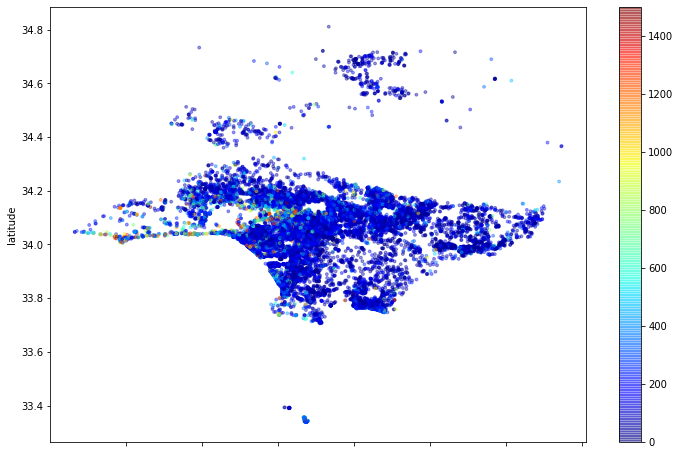

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.